# Part 1 ‐ Exploratory data analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15­minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

<font color='red'>
    
## Use one sample day as data to plot the aggregation data, one can see an hourly pattern in a day (0 hr & 12 hr). 

## Use one week of data to plot, one can see a significant pattern within a week (weekend effect ?). 

## Although, does not see a significant weekly pattern across each month, but the plot shows a  peak on March.  

</font>

In [1]:
import pandas as pd
from datetime import datetime
import json
from matplotlib import pyplot
import seaborn as sns

In [2]:
with open('ultimate_challenge/logins.json') as f:
    rawlog = json.load(f)
    f.close()
    
rawlog =pd.DataFrame(rawlog)
rawlog['login_time'] = pd.to_datetime(rawlog['login_time'])
rawlog = rawlog.sort_values('login_time')
rawlog['count'] = 1 
logs = rawlog.set_index('login_time')
logs.head()

,count
login_time,
1970-01-01 20:12:16,1
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:36,1
1970-01-01 20:16:37,1


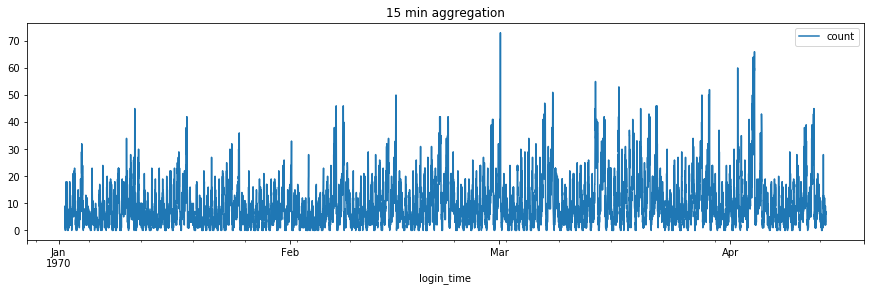

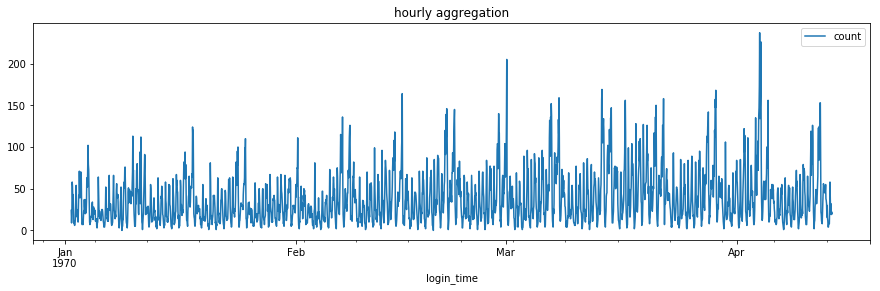

In [3]:
import matplotlib.dates as mdates
#https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects

logs[["count"]].resample("15Min").sum().plot(figsize=(15,4),title="15 min aggregation")
logs[["count"]].resample("H").sum().plot(figsize=(15,4),title="hourly aggregation")


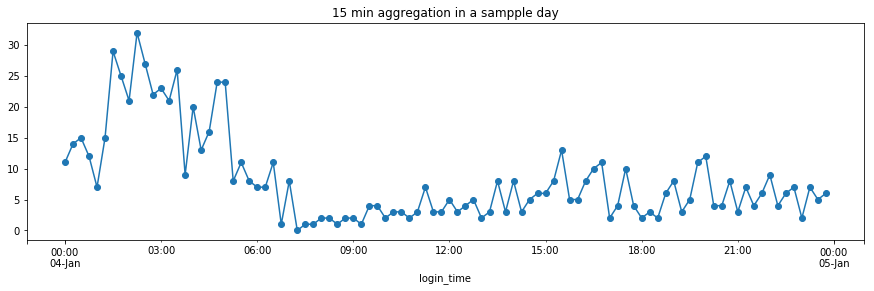

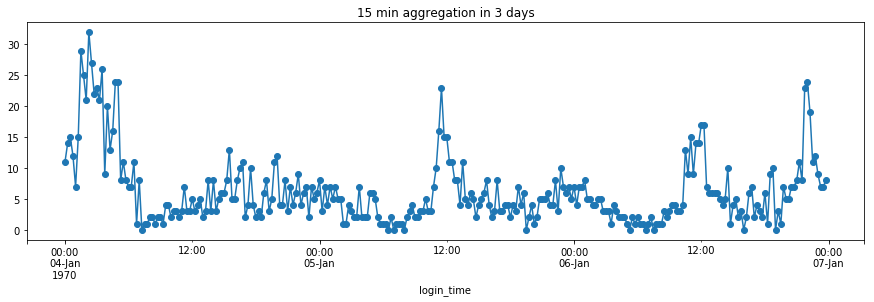

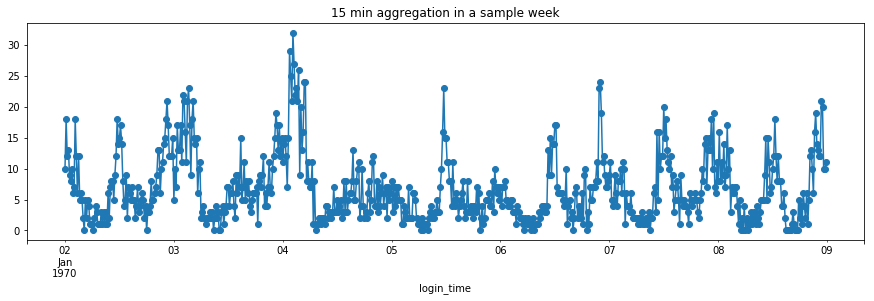

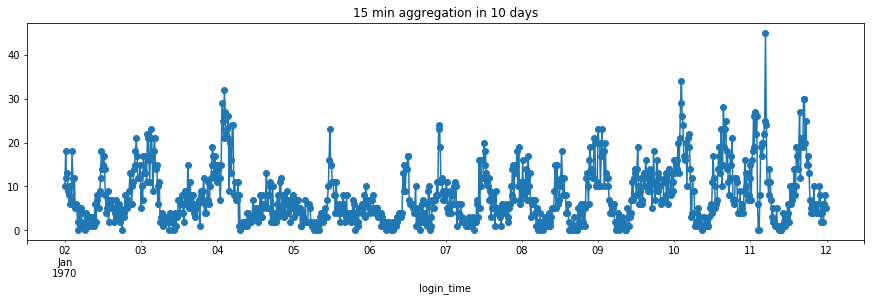

In [4]:
logs['1970-01-04']["count"].resample("15Min").sum().plot(figsize=(15,4),marker='o',title="15 min aggregation in a sampple day")
pyplot.show()

logs['1970-01-04':'1970-01-06']["count"].resample("15Min").sum().plot(figsize=(15,4),marker='o',title="15 min aggregation in 3 days")
pyplot.show()

logs['1970-01-02':'1970-01-08']["count"].resample("15Min").sum().plot(figsize=(15,4),marker='o',title="15 min aggregation in a sample week")
pyplot.show()

logs['1970-01-02':'1970-01-11']["count"].resample("15Min").sum().plot(figsize=(15,4),marker='o',title="15 min aggregation in 10 days")
pyplot.show()



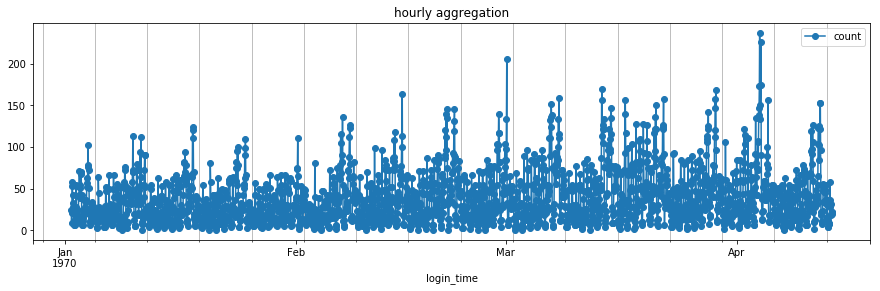

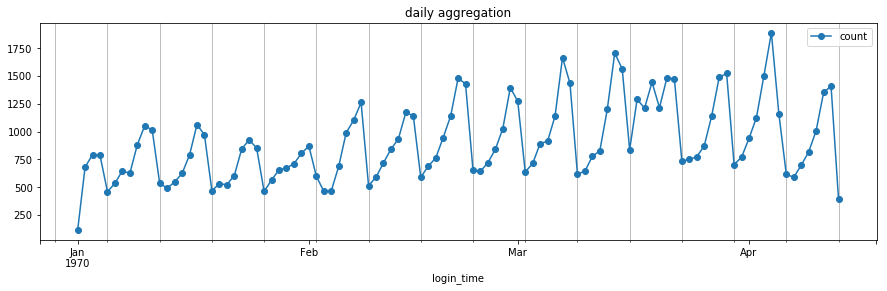

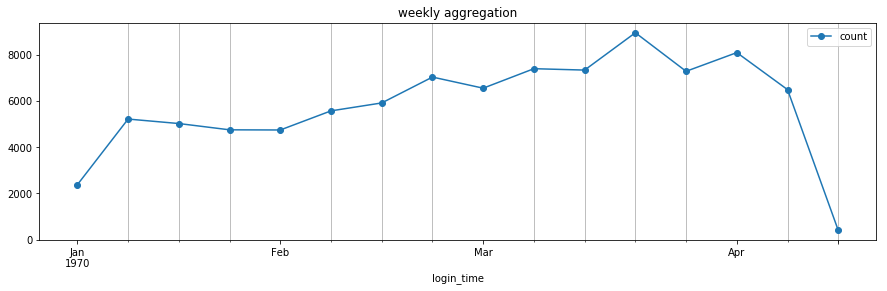

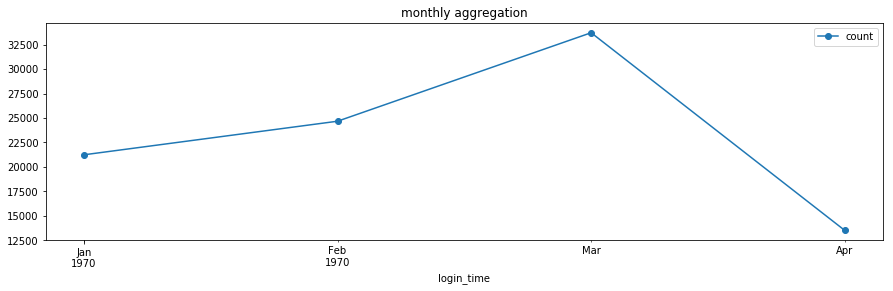

In [5]:
ax = logs[["count"]].resample("H").sum().plot(figsize=(15,4),title="hourly aggregation", marker='o')
ax.xaxis.grid(True, which="minor")

ax = logs[["count"]].resample("D").sum().plot(figsize=(15,4),title="daily aggregation", marker='o')
ax.xaxis.grid(True, which="minor")

ax = logs[["count"]].resample("W").sum().plot(figsize=(15,4),title="weekly aggregation",marker='o')
ax.xaxis.grid(True, which="minor")

logs[["count"]].resample("M").sum().plot(figsize=(15,4),title="monthly aggregation", marker='o')
ax.xaxis.grid(True, which="minor")

# Part 2 ‐ Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

<font color='red'>

## As the toll collection is the manger's reliable data source, The key measure of success should be the increase of the total toll passing.
  
## The trick is, the city manager's tool, without change the physical road structure but encourage more two-way usage, is to reduce the toll or give a discount.   Therefore, the count of passing, instead of the total dollar amount from toll will be the better representation. The toll reudce/ discount can then be translated to incentive from the Ultimate manger. 

</font>

<font color='red'>

# EXPERIMENT: TO INCREASE THE BRIDGE TOLL UTILIZATION (INCREASE VEHICLE PASSING THE BRIDGE)

# MATRIC: TOLL PASSING COUNT

# H1:  $sum(x)_t+1 > sum(x)_t$        $x: count $  
# H0:  $sum(x)_t+1 <= sum(x)_t$
    
    
# ASSUMPTION: LOWER THE TOLL PASS OR  GIVE DISCOUNT CAN INCREASE UTILIZATION

</font>

<font color='red'>

## one or more of the following approaches can be adapted: 
0. no discount<br>
1. discount to roundtrip toll passing<br>
2. discount for roundtrip toll passing only when two trips have enough separation time <br>
3. discount for low demand area to high demand area toll passing <br>
4. different discount rate on the selected period and direction <br>

## to compare different policies, randomly select participants from both areas and assign to a chosen group,  use a period time (week to a month) to collect the data, use statistic significance (p-value) as a recommendation.

</font>

# Part 3 ‐ Predictive modeling
Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.


<font color='red'>

## First, the data is loaded and converted to the appropriate data type (DateTime or Categorical ). Also, a "Retention" variable is created using the available timestamp for EDA and modeling 

</font>

In [6]:
with open('ultimate_challenge/ultimate_data_challenge.json') as f:
    data_challenge = json.load(f)
    f.close()
data = pd.DataFrame(data_challenge)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [7]:
data['signup_date'] = pd.to_datetime(data['signup_date'])
data['last_trip_date'] = pd.to_datetime(data['last_trip_date'])
data['city'] = data['city'].astype('category')
data['phone'] = data['phone'].astype('category')
data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [8]:
data.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [9]:
data['6th'] = data.signup_date + pd.DateOffset(months=5)
data['retention'] = data['6th'] <= data['last_trip_date']
data[['signup_date','last_trip_date','6th','retention']].head()

,signup_date,last_trip_date,6th,retention
0,2014-01-25,2014-06-17,2014-06-25,False
1,2014-01-29,2014-05-05,2014-06-29,False
2,2014-01-06,2014-01-07,2014-06-06,False
3,2014-01-10,2014-06-29,2014-06-10,True
4,2014-01-27,2014-03-15,2014-06-27,False


<font color='red'>

##  Variables have been plotted using Retention as grouping,  the distributions between "retain" vs "not retain" do not show significantly shift.  Therefore, they can be comfortably serving as the prediction variables. 

</font>

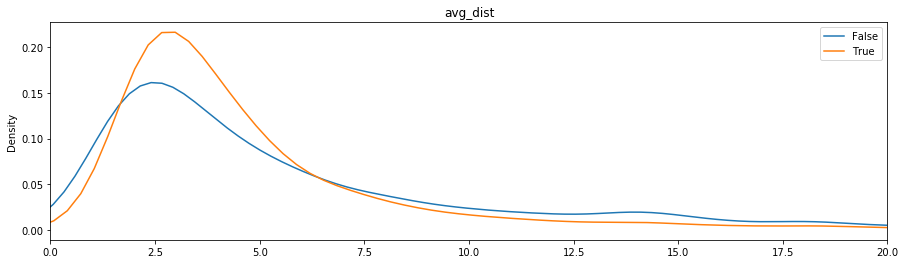

In [10]:
data.groupby('retention').avg_dist.plot(figsize=(15,4),legend=True, logx=False, xlim=(0,20),kind='kde',title='avg_dist')
pyplot.show()

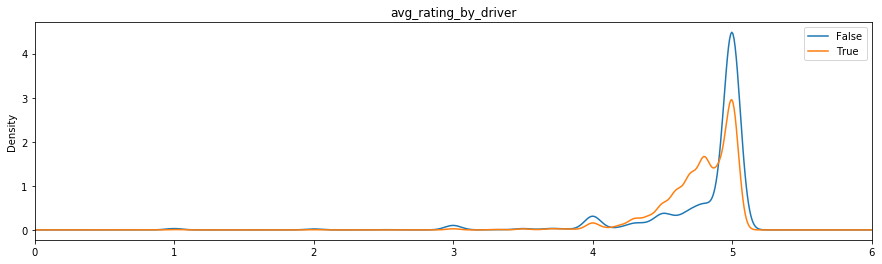

In [11]:
data.groupby('retention').avg_rating_by_driver.plot(figsize=(15,4),legend=True,xlim=(0,6), kind='kde',title='avg_rating_by_driver')
pyplot.show()


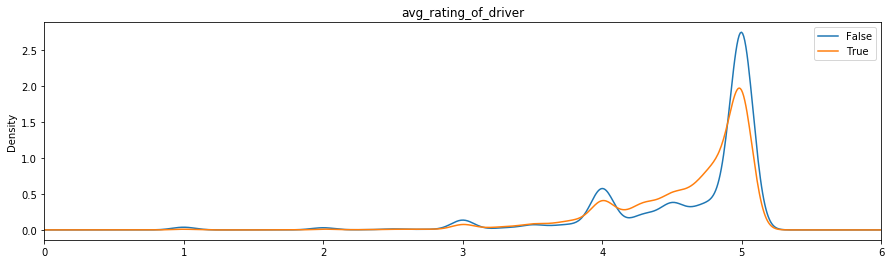

In [12]:
data.groupby('retention').avg_rating_of_driver.plot(figsize=(15,4),legend=True,xlim=(0,6),kind='kde',title='avg_rating_of_driver')
pyplot.show()

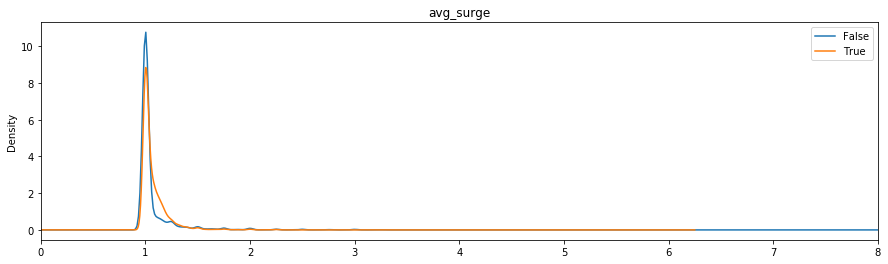

In [13]:
data.groupby('retention').avg_surge.plot(figsize=(15,4),legend=True, logx=False, xlim=(0,8),kind='kde',title='avg_surge')
pyplot.show()

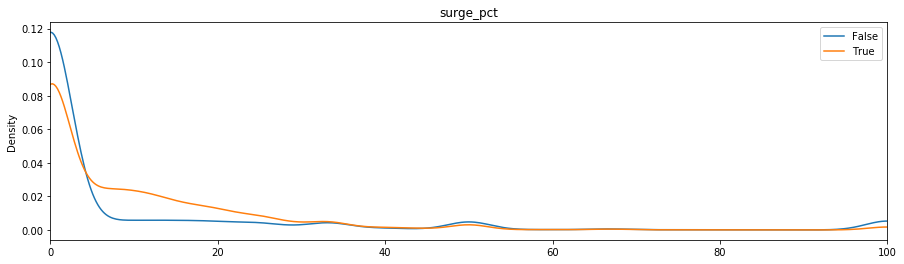

In [14]:
data.groupby('retention').surge_pct.plot(figsize=(15,4),legend=True, logx=False, xlim=(0,100),kind='kde',title='surge_pct')
pyplot.show()

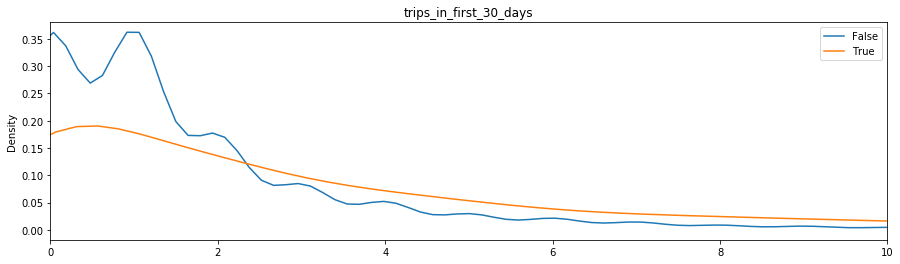

In [15]:
data.groupby('retention').trips_in_first_30_days.plot(figsize=(15,4),legend=True, logx=False, xlim=(0,10),kind='kde',title='trips_in_first_30_days')
pyplot.show()

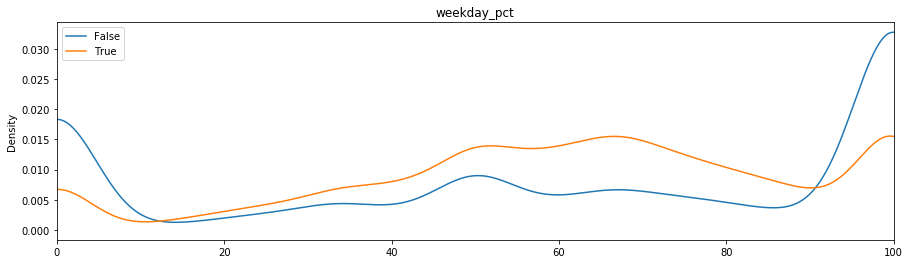

In [16]:
data.groupby('retention').weekday_pct.plot(figsize=(15,4),legend=True, logx=False, xlim=(0,100),kind='kde',title='weekday_pct')
pyplot.show()

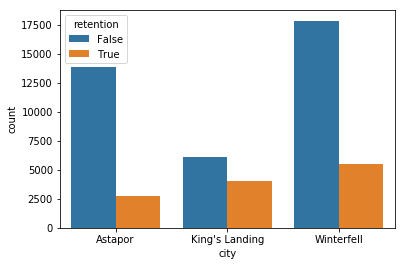

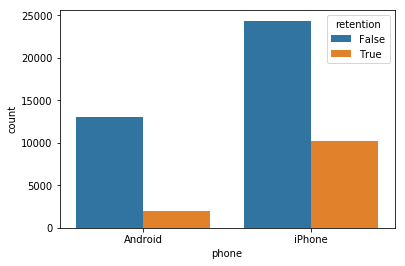

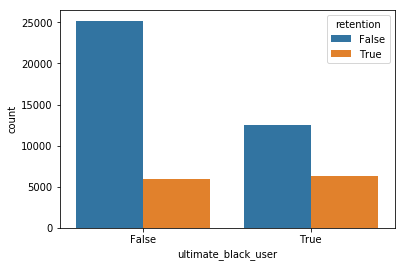

In [17]:
sns.countplot(x="city", hue='retention', data=data)
pyplot.show()
sns.countplot(x="phone", hue='retention', data=data)
pyplot.show()
sns.countplot(x="ultimate_black_user", hue='retention', data=data)
pyplot.show()
#sns.catplot(y="city", x="retention", kind="violin", data=data)
#sns.catplot(y="phone", x="retention", kind="violin", data=data)
#sns.catplot(y="ultimate_black_user", x="retention", kind="violin", data=data)


<font color='red'>

## The missing avg_rating_of_driver data counts as around 10% of all data. Therefore, filled with average value been applied. The rest of the missing values are about 1%, drop the observations been considered. This cell also converts the categorical data into categorical code for later modeling steps. 

</font>

In [18]:
data['avg_rating_of_driver']= data['avg_rating_of_driver'].fillna(data['avg_rating_of_driver'].mean())
data['ultimate_black_user']=data['ultimate_black_user'].apply(lambda x: 1 if x else 0)
data['retention']=data['retention'].apply(lambda x: 1 if x else 0)
data['city_cat'] = data['city'].astype('category').cat.codes
data['phone_cat'] = data['phone'].astype('category').cat.codes
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49406 entries, 0 to 49999
Data columns (total 16 columns):
avg_dist                  49406 non-null float64
avg_rating_by_driver      49406 non-null float64
avg_rating_of_driver      49406 non-null float64
avg_surge                 49406 non-null float64
city                      49406 non-null category
last_trip_date            49406 non-null datetime64[ns]
phone                     49406 non-null category
signup_date               49406 non-null datetime64[ns]
surge_pct                 49406 non-null float64
trips_in_first_30_days    49406 non-null int64
ultimate_black_user       49406 non-null int64
weekday_pct               49406 non-null float64
6th                       49406 non-null datetime64[ns]
retention                 49406 non-null int64
city_cat                  49406 non-null int8
phone_cat                 49406 non-null int8
dtypes: category(2), datetime64[ns](3), float64(6), int64(3), int8(2)
memory usage: 5.1 MB


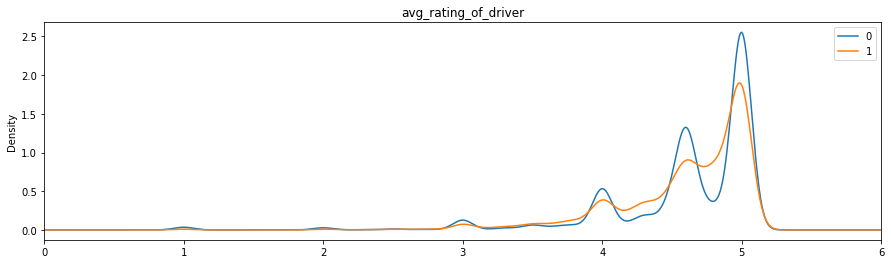

In [19]:
data.groupby('retention').avg_rating_of_driver.plot(figsize=(15,4),legend=True,xlim=(0,6),kind='kde',title='avg_rating_of_driver')
pyplot.show()

<font color='red'>

##  The standard data split and ML models been conducted below. The logistic regression has 67% accuracy but the ensemble approach can reach almost 80% accuracy.  

</font>

In [20]:
X = data[['avg_dist','avg_rating_by_driver','avg_rating_of_driver','avg_surge','city_cat','phone_cat','surge_pct','trips_in_first_30_days','ultimate_black_user','weekday_pct']]
y = data['retention']

In [21]:
%time

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, stratify= y, random_state=42)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.77 µs


In [22]:
%time

from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(cv=5, random_state=42, solver='liblinear', max_iter=500, class_weight='balanced').fit(X_train, y_train)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs


In [23]:
clf.coef_

array([[-0.03447419, -0.0344053 , -0.02785701, -0.00980657,  0.05582505,
         0.13363591,  0.00157912,  0.10470321,  0.11649755,  0.00015866]])

In [24]:
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.665380255842824
0.6713082901554405


In [25]:
%time 

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=5,random_state=42).fit(X_train, y_train)  

CPU times: user 7 µs, sys: 8 µs, total: 15 µs
Wall time: 9.06 µs


In [26]:
print(clf.feature_importances_)

[0.00608757 0.25157351 0.00338417 0.14430566 0.05038729 0.07120001
 0.2600996  0.06371837 0.04353193 0.10571189]


In [27]:
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.7914395206995196
0.7962273316062176


In [28]:
%time 

from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=3, random_state=40).fit(X_train, y_train)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.25 µs


In [29]:
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.8226912074269984
0.7965511658031088


In [30]:
clf.feature_importances_

array([0.05420513, 0.31463205, 0.0202002 , 0.03896861, 0.10180593,
       0.05628025, 0.2535539 , 0.0534628 , 0.0286379 , 0.07825322])

<font color='red'>

## According to feature importances, the following variables has higher impact:avg_rating_by_driver, avg_surge, city_cat, surge_pct, weekday_pct. 

## The weekday_pct is the user behavior which is an observation which is not controllable by Ultimate 

## The avg_surge and surge_pct can be controlled by Ultimate. Should Ultimate lower the surge and surge rate?
 
## The city category is also an observation that shows the general behavior difference among cities.  Should Ultimate differentiate policy on the different cities?

## The avg_rating_by_driver plays an important role but cannot explain directly.  according to the plot, when a driver gives a higher rate to passengers, the higher the chance the passenger will not continue using the service.  This should consider a dive in analysis to find out the reason.

</font>